# Chicago Car Crashes Trends and Patterns

## Final Project Part 3

Author: Jonathan Farrell Kusuma

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
from collections import Counter 

For the third part of my final project, I will be using ipywidgets to bring interactivity to my visualizations. In this jupyter notebook, I created five visualizations, an interactive histogram and a dashboard with two plots of color mapped location points and a bubble plot using matplotlib's scatter along with three other contextual visualization. Using the data from the previous part, (https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if), I used the pandas and numpy library to create the visualizations.

Below shows a summary of the data:

In [2]:
crash = pd.read_csv('https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD')

In [3]:
crash

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568100,9a9db62f3334a1fad706f97c5a4ebb8485668447c176e2...,JE299347,NaN,07/12/2021 06:37:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,18,2,7,41.736965,-87.721652,POINT (-87.721652118145 41.736965321289)
568101,db31327d28803316b8f44f0ec86d6e76a248934f3d1bfc...,JE295652,NaN,07/07/2021 09:25:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,21,4,7,41.747538,-87.604986,POINT (-87.604985730802 41.747538448447)
568102,d51aae396db49981c7ee26ceb54dfcab3c4b06d0cc5d7d...,JE298826,NaN,07/12/2021 10:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO SIDE,...,0.0,1.0,1.0,0.0,10,2,7,41.752918,-87.621573,POINT (-87.621572939578 41.752917594949)
568103,6f9abc7e7f54095cef0fa17e16e6f72eb14f8d17d3b572...,JE300245,NaN,07/13/2021 04:15:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,16,3,7,41.781830,-87.668979,POINT (-87.668979124866 41.781829602685)


### Contextual visualizations

Below uses matplotlib to plot the count of car crashes in different weather scenarios.Using a bar graph, this visualization shows a clear trend in car crashes in clear weather.

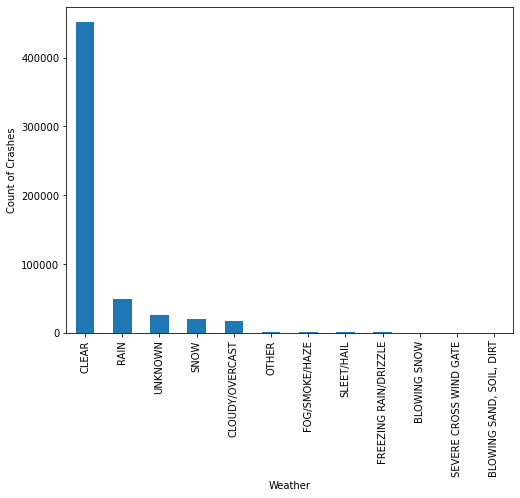

In [5]:
crash['WEATHER_CONDITION'].value_counts().plot(ylabel = 'Count of Crashes', xlabel = 'Weather', kind='bar', figsize=(8,6))

Below uses matplotlib to plot the count of car crashes in different road lighting conditions.Using a bar graph, this visualization shows a clear trend in car crashes in daylight.

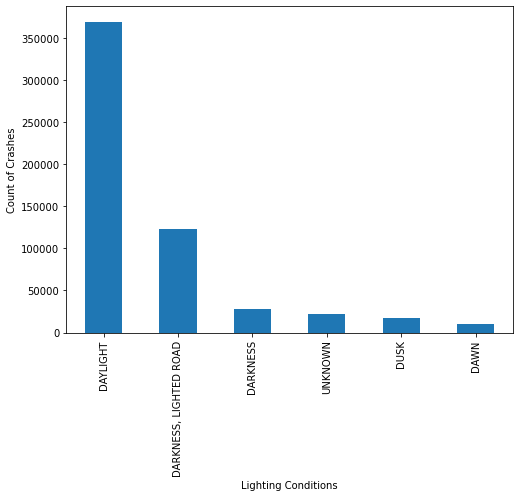

In [6]:
crash['LIGHTING_CONDITION'].value_counts().plot(ylabel = 'Count of Crashes', xlabel = 'Lighting Conditions', kind='bar', figsize=(8,6))

Below uses matplotlib to plot the count of car crashes in different road posted speed limitss.Using a bar graph, this visualization shows a clear trend in car crashes in 30mph speed limited roads.

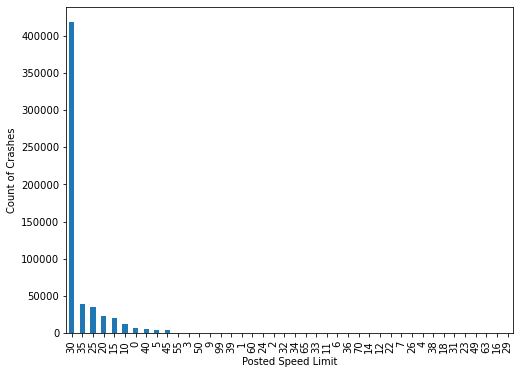

In [7]:
crash['POSTED_SPEED_LIMIT'].value_counts().plot(ylabel = 'Count of Crashes', xlabel = 'Posted Speed Limit', kind='bar', figsize=(8,6))

### Interactive visualizations

In [8]:
column = ['CRASH_HOUR', "CRASH_MONTH", 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING']
group_by = ["none", "LIGHTING_CONDITION", 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'POSTED_SPEED_LIMIT']

To use the visualization below, select one of the possible columns to create a different histogram. It is also possible to group these visualization by different factors such as lighting, weather conditions, first crash types and posted speed limit. Selecting a group by column will plot several histograms from unique values in the selected group by column. Using an if/else statement, I was also able to let users not choose a group by column by choosing "none" as the group by column.

In [9]:
@ipywidgets.interact(column = column, group_by = group_by)
def make_plot_hist(column, group_by):
    
    fig, ax = plt.subplots(figsize=(12,12))
    
    if group_by == "none":
        crash.hist(column = column, ax = ax)
    else:
        crash.hist(column = column, by = group_by, ax = ax)
    plt.show()

interactive(children=(Dropdown(description='column', options=('CRASH_HOUR', 'CRASH_MONTH', 'INJURIES_TOTAL', '…

In [10]:
xfields = ["POSTED_SPEED_LIMIT", "WEATHER_CONDITION", "LIGHTING_CONDITION", "TRAFFICWAY_TYPE"]
yfields = ['INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR']
colorfields = ["none", 'INJURIES_TOTAL', 'NUM_UNITS', 'POSTED_SPEED_LIMIT']

In [11]:
crash_nona = crash.dropna(subset=['LATITUDE', 'LONGITUDE'])
crash_nona = crash_nona[(crash_nona['LATITUDE'] != 0) & (crash_nona['LONGITUDE'] != 0)]

In [12]:
unique_street = crash.STREET_NAME.unique()

The second visualization below uses a scatterplot to show correlation and trends and a plot for all the accidents locations using the longitude and latitude data from the dataset. Select an x field and y field to change the visualization. It is also possible to use a color field to change the color of these points based on the data from this dataset such as by the number of total injuries, number of cars involved in the accident and posted speed limit. Selecting "none" will allow the user to not pick a color field for the location plot. 

This visualization also allows users to filter by street name and will automatically filter out points that are not equal to the streeet name in both the location points and the user selected x and y fields. This will allow users to visualize the street and locations of where these accidents happen. In addition, I also implemented a checkbox for users to decide whether or not they want to filter by street.

In [13]:
@ipywidgets.interact(xfield = xfields, yfield = yfields, colorfield = colorfields, street = ipywidgets.Checkbox(False, description='Filter Street'), streetname = unique_street)

def make_plot(xfield, yfield, colorfield, street, streetname):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
    plt.xlabel(xfield)
    plt.xticks(rotation = 90)
    plt.ylabel(yfield)
    plt.yticks(rotation = 90)
    crash_data = crash_nona
    if street:
        crash_data = crash_data[crash_data.STREET_NAME == streetname] 
    freq = crash_data.groupby([xfield, yfield], as_index=False).size()
    if colorfield == "none":
        ax1.scatter(crash_data["LONGITUDE"], crash_data["LATITUDE"], alpha=0.3)
    else:
        ax1.scatter(crash_data["LONGITUDE"], crash_data["LATITUDE"], c=np.log10(crash_data[colorfield]), cmap = 'rainbow')
    ax2.scatter(freq[xfield], freq[yfield],s = freq["size"] * 0.05 + 20, alpha=0.8)
    plt.show()

interactive(children=(Dropdown(description='xfield', options=('POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGH…